<a href="https://colab.research.google.com/github/louis-sanna-eki/graph-generation/blob/master/notebooks/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In this notebook we keep track of all valid examples.

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install pandas

### CO2 linechart

Bonjour Louis, désolé pour ma faible réactivité, on avait beaucoup de dossiers sur le feu. Suite à notre discussion de l'autre jour, et pour entamer une première collaboration sur un premier graphique, je t'envoie une base de données sur les émissions de CO² (Our World in Data). Pourrais-tu à partir de ces données, produire un graphique assez simple qui représente l'évolution des émissions de CO² depuis 1950 comparant l'Union Européenne, l'Amérique du Nord, la Chine, l'Afrique, l'Amérique du Sud ?

In [ ]:
PATH_TO_CO2_FILE = '/content/drive/My Drive/lr-data/graph-generation/owd-co2.csv'

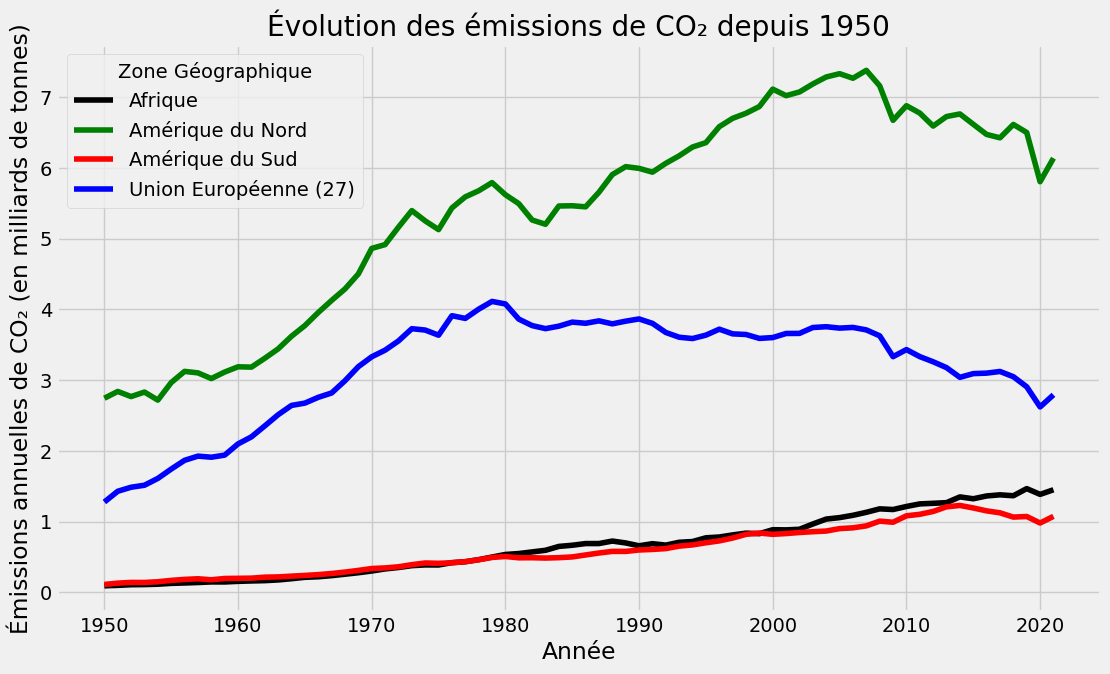

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Apply the FiveThirtyEight style
plt.style.use('fivethirtyeight')

# Load the data from Google Drive
data = pd.read_csv(PATH_TO_CO2_FILE, delimiter=';')

# Filter data for years since 1950 and specified entities
entities = ["Africa", "European Union (27)", "North America", "South America"]
filtered_data = data[(data['Year'] >= 1950) & (data['Entity'].isin(entities))]

# Group data by year and entity
grouped_data = filtered_data.groupby(['Year', 'Entity'])['Annual CO₂ emissions'].sum().unstack()

# Define specific colors for each continent
colors = {"Africa": "black", "European Union (27)": "blue", "North America": "green", "South America": "red"}

# Translation dictionary for entity names
entity_translations = {
    "Africa": "Afrique",
    "European Union (27)": "Union Européenne (27)",
    "North America": "Amérique du Nord",
    "South America": "Amérique du Sud"
}

# Sort entities by French alphabetical order
sorted_entities = sorted(entity_translations.keys(), key=lambda x: entity_translations[x])

# Create the plot
plt.figure(figsize=(12, 7))
for entity in sorted_entities:
    translated_entity = entity_translations[entity]
    plt.plot(grouped_data.index, grouped_data[entity]/1e9, label=translated_entity, color=colors[entity])

# Adding labels, title, and legend in French
plt.xlabel('Année')
plt.ylabel('Émissions annuelles de CO₂ (en milliards de tonnes)')
plt.title('Évolution des émissions de CO₂ depuis 1950')
plt.legend(title='Zone Géographique')

# Show the plot
plt.show()

### GDP

In [3]:
PATH_TO_GDP_FILE = '/content/drive/My Drive/lr-data/graph-generation/PIB_UE.csv'

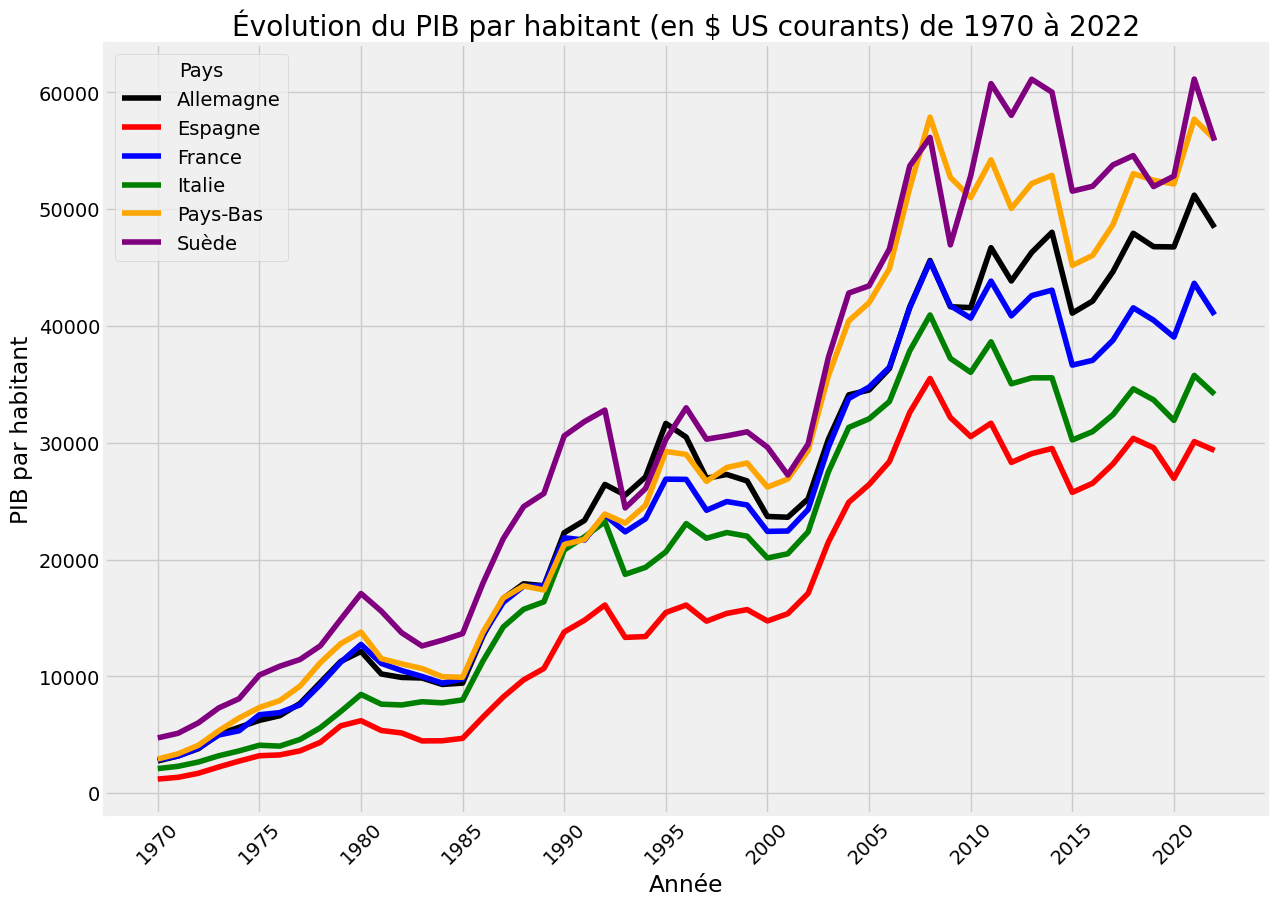

In [4]:
# Voici le code complet pour créer le graphique à partir du fichier CSV brut. Ce code comprend le nettoyage des données,
# la sélection des pays, la conversion des valeurs numériques et la création du graphique avec les spécifications données.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chemin vers le fichier CSV
csv_file_path = PATH_TO_GDP_FILE

# Chargement du fichier CSV avec détection du délimiteur semi-colon
gdp_data = pd.read_csv(csv_file_path, delimiter=';', encoding='ISO-8859-1', skiprows=[2])

# Nettoyage des données: enlever les deux premières lignes et définir les bons en-têtes de colonnes
gdp_data_cleaned = gdp_data.drop([0, 1])
gdp_data_cleaned = gdp_data_cleaned.reset_index(drop=True)
gdp_data_cleaned.columns = gdp_data.iloc[1]
gdp_data_cleaned = gdp_data_cleaned.drop(0)

# Correction des noms des pays en français
country_names = {
    'France': 'France',
    'Germany': 'Allemagne',
    'Italy': 'Italie',
    'Spain': 'Espagne',
    'Sweden': 'Suède',
    'Netherlands': 'Pays-Bas'
}

# Mise à jour du DataFrame avec les noms des pays en français
gdp_data_cleaned['Country Name'].replace(country_names, inplace=True)

# Sélection des pays requis pour l'analyse
required_countries = ['France', 'Allemagne', 'Italie', 'Espagne', 'Suède', 'Pays-Bas']
gdp_selected_countries = gdp_data_cleaned[gdp_data_cleaned['Country Name'].isin(required_countries)]

# Conversion des années en colonnes en entiers et tri dans l'ordre croissant
years = np.arange(1970, 2023).astype(str)
gdp_selected_countries = gdp_selected_countries[['Country Name'] + list(years)]

# Remplacement des virgules par des points pour la conversion en float
gdp_selected_countries[years] = gdp_selected_countries[years].replace({',': '.'}, regex=True)
gdp_selected_countries[years] = gdp_selected_countries[years].apply(pd.to_numeric, errors='coerce')

# Définition des couleurs pour chaque pays
colors = {
    'France': 'blue',
    'Allemagne': 'black',
    'Italie': 'green',
    'Espagne': 'red',
    'Suède': 'purple',
    'Pays-Bas': 'orange'
}

# Création du graphique
plt.figure(figsize=(15, 10))
plt.style.use('fivethirtyeight')

# Tracé de l'évolution du PIB par habitant pour chaque pays sélectionné avec les couleurs spécifiées
for index, row in gdp_selected_countries.iterrows():
    plt.plot(years, row[years], label=row['Country Name'], color=colors[row['Country Name']])

# Ajout des légendes, titres et étiquettes en français
plt.legend(title='Pays')
plt.title('Évolution du PIB par habitant (en $ US courants) de 1970 à 2022')
plt.xlabel('Année')
plt.ylabel('PIB par habitant')

# Configuration des étiquettes de l'axe des x pour réduire le chevauchement
plt.xticks(np.arange(0, len(years), 5), years[::5], rotation=45)

# Affichage du graphique
plt.show()
